<a href="https://colab.research.google.com/github/PLEX-GR00T/Cart_Pole_LQR/blob/main/Kalman_gain_on_CartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
import random


In [2]:
M = 1
m = 0.3
b = 0.1
l = 1
I = 0.001
g = 9.8

A = (I + (m*(l**2))*b)
B = (I*(M+m) + (M*m*(l)**2))
C = ((m**2)*g*(l**2))
D = (-m*l*b)
E = ((m*g*l)*(M+m))
F = (m*l)

AA = -A/B
BB = C/B
CC = D/B
DD = E/B

EE = A/B
FF = F/B

# Define the N for loop and storage uses.
N = 500

# Define the frame to time 
dt = 0.01

In [3]:
# Generate the Tb matrix Will use it to go generate Ts. 
Tb = np.array([
            [0, 1,  0,  0],
            [0, AA, BB, 0],
            [0, 0,  0,  1],
            [0, CC, DD, 0]]) 

# Generate the Ta matrix.
Ta = np.array([0, EE, 0, FF])* dt

# Generate the Ts matrix with the use of Identity matrix.
Identity = np.identity(4, dtype = float)
Ts = Identity + (Tb)*dt

# sensor matrix : 
C_ = np.array([
            [0, 1, 0, 0],            
            [0, 1, 0, 0]])

Ra = -2
rho = 10
sigma_val = 0.01

In [4]:
def Rs_(rho):
  return -np.array([[rho/20, 0, 0, 0],
                      [0, rho/20, 0, 0],
                      [0, 0, rho, 0],
                      [0, 0, 0, rho/10]]) 

In [5]:
def LQR_Eq(Ta, Ts, rho, sigma_val):
  Rs = Rs_(rho)
  sigma = np.identity(4,dtype = float) * sigma_val

  V = [[]] * N
  V[499] = Rs

  q = [[]] * N
  q[499] = 0

  for i in range(N-1, 0, -1):
    V[i-1] = Rs + (Ts.T @ V[i].T @ Ts) - ((Ta.T @ V[i] @ Ts).T) * ((Ra + (Ta.T @ V[i] @ Ta))**(-1)) @ (Ta.T @ V[i] @ Ts)
    q[i-1] = q[i] +  np.trace(sigma @ V[i])

  Lk = [[]] * (N-1)
  for i in range(0, N-1, 1):
    Lk[i] = ((Ra + Ta.T @ V[i] @ Ta)**(-1)) * (Ta.T @ V[i] @ Ts)
  return V, q, Lk

In [6]:
V, q, Lk = LQR_Eq(Ta, Ts, rho, sigma_val)

In [7]:
sd_v = 0.0321
V_ = np.identity(2) * sd_v

sd_w = 0.0123
W_ = np.identity(4) * sd_w

In [8]:
F = []

S = []
S.append([0.1, -0.05, 0.1, 0.01])

In [9]:
def pre_S(n):
  S_new = (Ts @ S[n-1]) + (Ta * F[n-1]) + np.random.normal(0, sd_w, 1)
  S.append(S_new)
  return S_new

In [10]:
def Y_(n):
  if n==0:
    print("Did it 0:")
    Y = (C_ @ S[0]) + np.random.normal(0, sd_v, 1)
    return Y
  else:
    Y = (C_ @ pre_S(n)) + np.random.normal(0, sd_v, 1)
    return Y

In [11]:
def kalman_gain():
  Sigma = [[]] * N
  Sigma[0] = np.identity(4) * 0.01

  X = [[]] * N
  X[0] = [0.1, -0.05, 0.1, 0.01]

  for i in range(1,N,1):
    Sigma[i] = W_ + (Ts @ Sigma[i-1] @ Ts.T) - (Ts @ Sigma[i-1] @ C_.T) @ ((V_ + C_ @ Sigma[i-1] @ C_.T)**(-1)) @ (C_ @ Sigma[i-1] @ Ts.T)

  K = [[]] * N
  for i in range(1,N,1):
    K[i] = (Ts @ Sigma[i-1] @ C_.T) @ ((V_ + C_ @ Sigma[i-1] @ C_.T)**(-1))
    X[i] = Ts @ X[i-1] + K[i] @ (Y_(i-1) - C_ @ X[i-1])
    f = -Lk[i-1] @ X[i]
    F.append(f)


In [12]:
kalman_gain()

Did it 0:


In [13]:
for i in range(len(F)):
  print(i)
  print(F[i])

0
-15.946608296188293
1
-18.74979192102062
2
-4.551886880238345
3
-15.162636488118586
4
-21.040693457183178
5
-18.668029916950285
6
-28.090008686474587
7
-21.714855312198875
8
6.3064895109052435
9
-27.348212485928627
10
45.27594729296741
11
28.41567901926689
12
163.524524805626
13
-121.98324127025582
14
199.58319124866102
15
64.43408126601916
16
-179.6499922248548
17
408.6000938700219
18
-326.1737427825248
19
2105.1207567275906
20
-353.9970718011957
21
-8021.709922638364
22
-8090.224654894942
23
-7415.47108044227
24
-2686.753289398155
25
-5021.281958558861
26
-550.8437605885143
27
-4168.142680063592
28
2681.6260540151115
29
537.4286576404008
30
-8538.242749884708
31
8597.043371060547
32
-45736.346788207746
33
35649.952968308244
34
25151.401059117
35
143642.65545507142
36
78099.31238000921
37
-202768.95614745896
38
9822136.066373143
39
-12437733.268653
40
12270018.393920334
41
-10274600.58115454
42
15108156.522245418
43
-29997973.674037408
44
-17622265.545019425
45
199343632.1784831
46


In [15]:
def plot_graph():
    
    # Plot x, phi and F v/s time
    time = [dt*i for i in range(1, 501)]
    
    fig, ax = plt.subplots(1, 3)
    for i in range(498):
      if -5 <= S[i][0] <= 5:
        ax[0].scatter(time[i], S[i][2], color = 'black')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('position (x)')
    ax[0].title.set_text('position - time graph')

    for i in range(498):
      if -5 <= S[i][2] <= 5:
        ax[1].scatter(time[i], S[i][3], color = 'black')
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('angle (phi)')
    ax[1].title.set_text('angle - time graph')

    for i in range(498):
      if (-0.5 <= S[i][0] <= 0.5 and -5 <= S[i][1] <= 5 
        and -5 <= S[i][2] <= 5 and -5 <= S[i][3] <= 5):
        ax[2].scatter(time[i], F[i], color = 'black')
    ax[2].set_xlabel('time')
    ax[2].set_ylabel('force (F)')
    ax[2].title.set_text('force - time graph')

    fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma_val))
    fig.set_size_inches(15, 5)
  

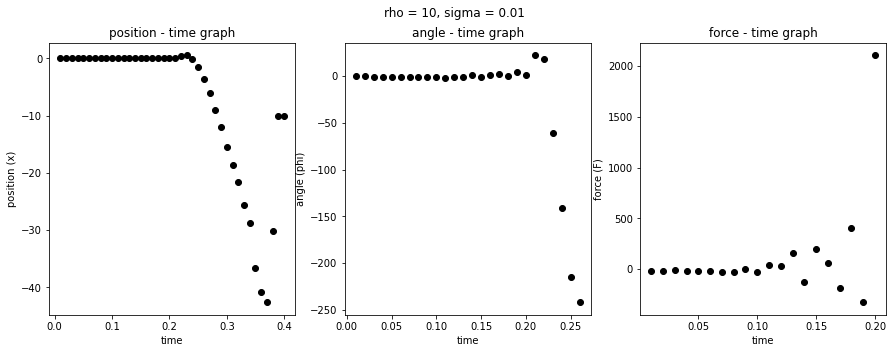

In [16]:
plot_graph()

In [17]:
def plot_graph_b():
    
    # Plot x, phi and F v/s time
    time = [dt*i for i in range(1, 501)]
    
    fig, ax = plt.subplots(1, 3)
    for i in range(498):
      ax[0].scatter(time[i], S[i][2], color = 'black')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('Angle (Phi1)')
    ax[0].title.set_text('position - time graph')

    for i in range(498):
      ax[1].scatter(time[i], S[i][3], color = 'black')
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('AngularVelocity (phi2)')
    ax[1].title.set_text('angle - time graph')

    for i in range(498):
      ax[2].scatter(time[i], F[i], color = 'black')
    ax[2].set_xlabel('time')
    ax[2].set_ylabel('force (F)')
    ax[2].title.set_text('force - time graph')

    fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma_val))
    fig.set_size_inches(15, 5)
  

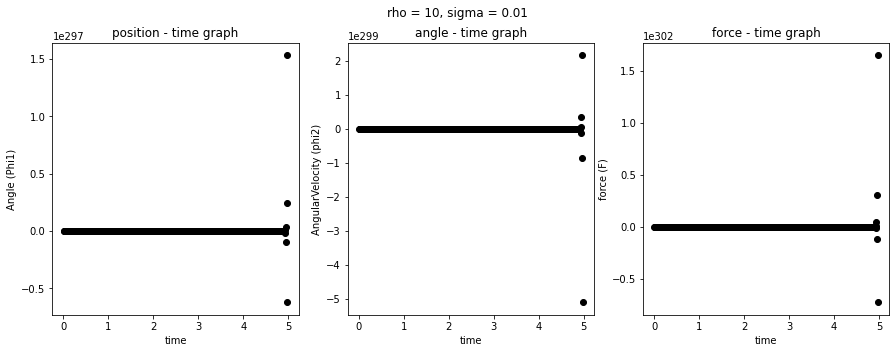

In [18]:
plot_graph_b()

In [28]:
def solve_b():
    time = [dt*i for i in range(1, 501)]
    
    fig, ax = plt.subplots(1, 2)
    for i in range(498):
      ax[0].scatter(S[i][0], S[i][1], color = 'black')
    ax[0].set_xlabel('position')
    ax[0].set_ylabel('velocity')
    ax[0].title.set_text('velocity - position graph')

    for i in range(498):
      ax[1].scatter(S[i][2], S[i][3], color = 'black')
    ax[1].set_xlabel('angle')
    ax[1].set_ylabel('angular velocity')
    ax[1].title.set_text('angular velocity - angle graph')


    fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma_val))
    fig.set_size_inches(10, 5)

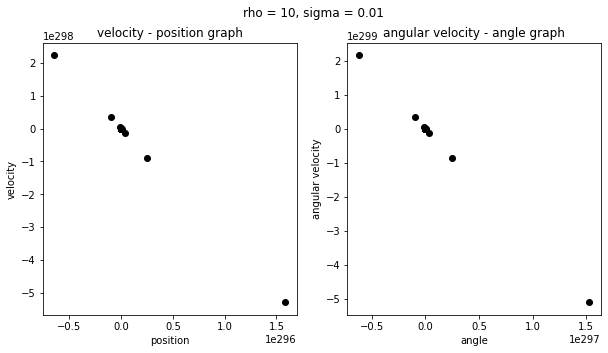

In [29]:
solve_b()